In [1]:
library(data.table)
library(anytime)
library(pwr)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
pwr.t.test(n = NULL, 
           d = 0.01,
           sig.level = 0.01,
           type = "two.sample", 
           alternative = "two.sided",
           power = .9)


     Two-sample t test power calculation 

              n = 297589.4
              d = 0.01
      sig.level = 0.01
          power = 0.9
    alternative = two.sided

NOTE: n is number in *each* group


In [3]:
data <-read.table('ydata-fp-td-clicks-v1_0.20090501',sep=''
                  ,header=TRUE,fill=TRUE,
                 nrow=50000)




data_2 <-read.table('ydata-fp-td-clicks-v1_0.20090510.gz',sep=''
                  ,header=TRUE,fill=TRUE,
                  nrow=50000)
data_2 <- data_2[,1:4]

In [4]:
head(data_2)

,X1241938500,X109766,X0,X.user
,<int>,<int>,<int>,<chr>
1,1241938500,109763,0,|user
2,1241938500,109764,0,|user
3,1241938500,109697,0,|user
4,1241938500,109723,0,|user
5,1241938500,109684,0,|user
6,1241938500,109697,0,|user


# Pipeline 1

In [5]:
data$X1241160900 <- anytime(as.numeric(data$X1241160900))
colnames(data)[5:150] <- paste('feature_id:feature_val',1:150)
oldnames = c("X1241160900","X109513","X0","X.user")
newnames = c("datetime","display_id", "user_click", "type")



data <- data %>% rename_at(vars(oldnames), ~ newnames)

# drop all NA rows
data <- data[complete.cases(data),]

Warning message in anytime(as.numeric(data$X1241160900)):
“NAs introduced by coercion”
Warning message in colnames(data)[5:150] <- paste("feature_id:feature_val", 1:150):
“number of items to replace is not a multiple of replacement length”
Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(oldnames)` instead of `oldnames` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



In [6]:
data$datetime <- anytime(as.numeric(data$datetime))
data$user_click <- as.numeric(as.character(data$user_click))
data$display_id <- as.numeric(as.character(data$display_id))

# Pipeline 2

In [7]:
oldnames_2 = c("X1241938500","X109766","X0","X.user")
newnames_2 = c("datetime","display_id", "user_click", "type")

data_2<- data_2 %>% rename_at(vars(oldnames_2), ~ newnames_2)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(oldnames_2)` instead of `oldnames_2` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



In [8]:
data_2$datetime <- anytime(as.numeric(data_2$datetime))
data_2$user_click <- as.numeric(as.character(data_2$user_click))
data_2$display_id <- as.numeric(as.character(data_2$display_id))
data_2 <- data_2[complete.cases(data_2),]

# Visualization

In [9]:
plot_1$datetime <- as.POSIXct(plot_1$datetime, format="%H:%M:%S")
ggplot(data=plot_1, aes(plot_1$datetime,f/100)) + geom_line() 

ERROR: Error in as.POSIXct(plot_1$datetime, format = "%H:%M:%S"): object 'plot_1' not found


In [10]:
plot_2 <- data_2 %>% group_by(datetime) %>%
summarize(f = sum(user_click ))
plot_2 <- data_frame(plot_2)
plot_2

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


datetime,f
<dttm>,<dbl>
2009-05-09 23:55:00,44
2009-05-10 00:00:00,191
2009-05-10 00:05:00,187
2009-05-10 00:10:00,162
2009-05-10 00:15:00,163
2009-05-10 00:20:00,155
2009-05-10 00:25:00,157
2009-05-10 00:30:00,153


Warning message:
“Use of `plot_2$datetime` is discouraged. Use `datetime` instead.”


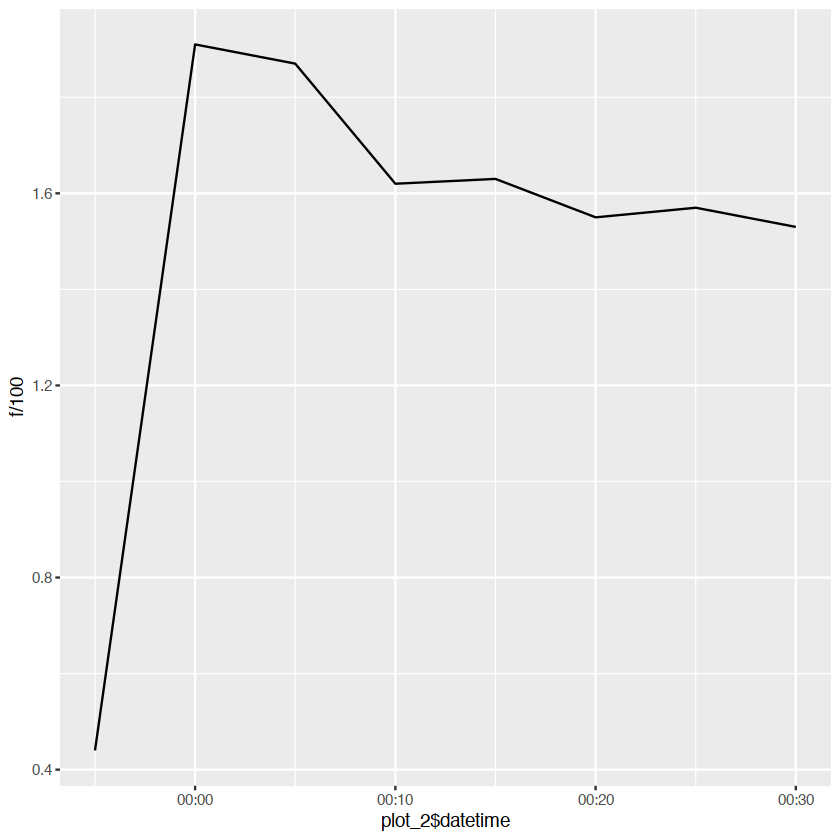

In [11]:
plot_2$datetime <- as.POSIXct(plot_2$datetime, format="%H:%M:%S")
ggplot(data=plot_2, aes(plot_2$datetime,f/100)) + geom_line() 

## Testing

In [12]:
group_1 <- data %>% group_by(display_id) %>%
summarise(total_click = sum(user_click)) %>% arrange(total_click)
group_1 <- group_1[2:30,]
group_1

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The `i` argument of ``[.tbl_df`()` must lie in [0, rows] if positive, as of tibble 3.0.0.
Use `NA_integer_` as row index to obtain a row full of `NA` values.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


display_id,total_click
<dbl>,<dbl>
109492,24
109515,33
109501,39
109495,41
109498,52
109512,57
109453,60
109506,62
109505,65


In [13]:
group_2 <- data_2 %>% group_by(display_id) %>%
summarise(total_click = sum(user_click)) %>% arrange(total_click)
group_2

`summarise()` ungrouping output (override with `.groups` argument)



display_id,total_click
<dbl>,<dbl>
109723,35
109764,36
109697,37
109760,40
109756,46
109767,48
109741,49
109763,54
109731,56


In [14]:
group_1$version <- 'group_1'
group_2$version <- 'group_2'

In [15]:
testing <- rbind(group_1,group_2)
testing <- testing[c(1:57),]

In [16]:
testing%>%
group_by(version) %>%
  summarise(
    count = n(),
    mean = mean(total_click, na.rm = TRUE),
    sd = sd(total_click, na.rm = TRUE)
  )

`summarise()` ungrouping output (override with `.groups` argument)



version,count,mean,sd
<chr>,<int>,<dbl>,<dbl>
group_1,29,64.4,18.37447
group_2,20,60.6,17.24254
NA,8,NaN,NA


Warning message:
“Removed 17 rows containing non-finite values (stat_boxplot).”


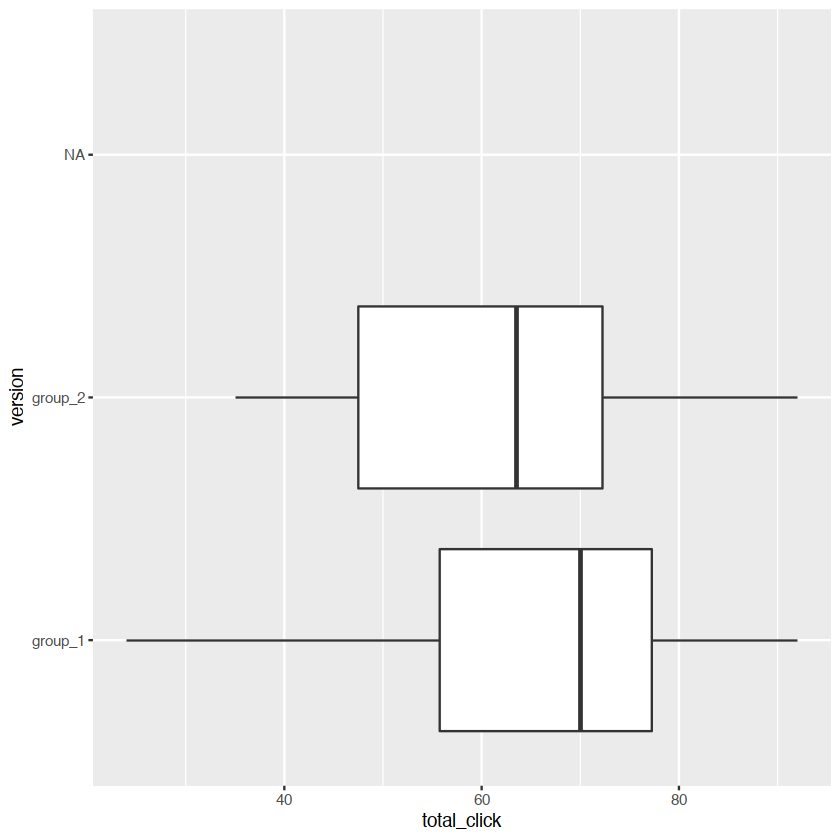

In [17]:
ggplot(testing, aes(total_click, version)) + 
	geom_boxplot()

In [18]:
t.test(total_click~version, data=testing)


	Welch Two Sample t-test

data:  total_click by version
t = 0.67443, df = 37.847, p-value = 0.5041
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.60773 15.20773
sample estimates:
mean in group group_1 mean in group group_2 
                 64.4                  60.6 
